<a href="https://colab.research.google.com/github/ABHISHEK-DEY-64150/Bioinformatics/blob/main/2017_CSE470_2017331021_E03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# BA1A: Compute the number of times a Pattern Appears in a Text

In [ ]:
def PatternCount(Text, Pattern):
        count = 0
        for i in range(len(Text)-len(Pattern)+1):
            if Text[i:i+len(Pattern)] == Pattern:
                count = count + 1
        return count

print(PatternCount("AAATTACGCATAGCATAGCAATA","ATA"))

3


#BA1B : Find the most Frequent Word in a string

In [ ]:
from collections import Counter

def most_freq_words(seq,k):
  kmers = Counter([seq[i:i+k] for i in range(len(seq)-k+1)]).most_common()
  return [kmer[0] for kmer in kmers if kmers[0][1] == kmer[1]]

seq = "ACGTTGCATGTCGCATGATGCATGAGAGCT" 
k = 4

most_freq_words(seq,k)


['GCAT', 'CATG']

# BA1D : Find All Occurrences of a Pattern in a String

In [ ]:
def find_all_loc(seq,kmer):
  loc = 0
  while True:
    loc = seq.find(kmer,loc) + 1
    if loc>0:
      yield loc-1
    else:
      return loc - 1


kmer = "ATAT"
seq = "GATATATGCATATACTT"

print(' '.join(map(str,find_all_loc(seq,kmer))))

1 3 9


#BA1E : Find Patterns Forming Clumps in a String

In [ ]:
def find_clumping_kmers(seq,k,l,t):
  clumping_kmers = set()
  for i in range(len(seq)-l+1):
    clump_seq = seq[i:i+l]
    kmers = Counter([clump_seq[i:i+k] for i in range(len(seq) - k+1)]).most_common()
    for kmer in kmers:
      if kmer[1] >= t:
        clumping_kmers.add(kmer[0])
  return clumping_kmers

seq = "CGGACTCGACAGATGTGAAGAAATGTGAAGACTGAGTGAAGAGAAGAGGAAACACGACACGACATTGCGACATAATGTACGAATGTAATGTGCCTATGGC"
k,l,t = 5,75,4

print(' '.join(find_clumping_kmers(seq,k,l,t)))

 CGACA AATGT GAAGA


#BA1F : Find a Position in a Genome Minimizing the Skew

In [ ]:
import numpy as np 
def skew_positions(seq):
  d = {'A':0,'T':0,'G':1,'C':-1}
  gc_cumsum = np.cumsum([d[bp] for bp in seq])
  print(' '.join(map(str,np.where(gc_cumsum == min(gc_cumsum))[0]+1)))

seq = "CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTTTTCCGGCGACCGTAATCGTCCACCGAG"
skew_positions(seq)

53 97


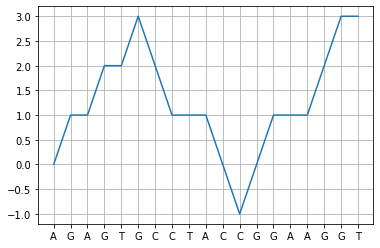

In [ ]:
import matplotlib.pyplot as plt

def skew_diagram(seq):
    d = {'A':0,'T':0,'G':1,'C':-1}
    plt.plot( np.cumsum([d[bp] for bp in seq]))
    plt.xticks(range(len(seq)),seq)
    plt.grid()
    plt.show()


seq = "AGAGTGCCTACCGGAAGGT"
#seq = "CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTTTTCCGGCGACCGTAATCGTCCACCGAG"

skew_diagram(seq)

#BA1G : Compute the Hamming Distance Between Two Strings

In [ ]:
def hamming_dist(seq1,seq2):
    count = 0
    for i in range(len(seq1)):
      if seq1[i] != seq2[i] :
        count += 1 

    return count

seq1 = "GGGCCGTTGGT" 
seq2 = "GGACCGTTGAC"  

print(hamming_dist(seq1,seq2))

3


#BA1H : Find All Approximate Occurrences of a Pattern in a String

In [ ]:
def find_all_approx_loc(seq,kmer,d):
    positions = []

    for i in range(len(seq)-len(kmer)+1):
        if hamming_dist(kmer,seq[i:i+len(kmer)]) <= d :
          positions.append(i)

    return positions


seq = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAATGCCTAGCGGCTTGTGGTTTCTCCTACGCTCC"
kmer = "ATTCTGGA"
d = 3

find_all_approx_loc(seq,kmer,d)

[6, 7, 26, 27, 78]